<a href="https://colab.research.google.com/github/Praneesh-Sharma/Space-Titanic-Survival/blob/main/space_titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Titanic Survival prediciton
#### Praneesh Sharma

## Importing libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [5]:
data = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)
sample=pd.read_csv('sample_submission.csv', header=0)

In [6]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
data.shape

(8693, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


##### there are some missing values in all the columns

In [10]:
# displaying number of null values in each column
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
# dropping null values
data = data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [13]:
# converting transported into numerical values
data['Transported'].replace({False:0, True:1}, inplace=True)
data['Transported']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

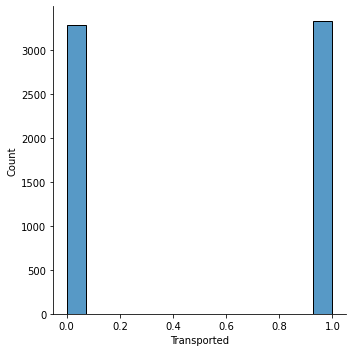

In [14]:
sns.displot(data['Transported'])

In [15]:
print(data['Transported'].value_counts())

1    3327
0    3279
Name: Transported, dtype: int64


##### 4378 passengers survived

In [16]:
# removing the transported column, so that the test dataset can be appended
survival = data['Transported']
data.drop(['Transported'], axis=1, inplace=True)
survival

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

### Combining trrain and test dataset

In [17]:
df = data.append(test)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


### Analyzing the new dataframe

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   10883 non-null  object 
 1   HomePlanet    10796 non-null  object 
 2   CryoSleep     10790 non-null  object 
 3   Cabin         10783 non-null  object 
 4   Destination   10791 non-null  object 
 5   Age           10792 non-null  float64
 6   VIP           10790 non-null  object 
 7   RoomService   10801 non-null  float64
 8   FoodCourt     10777 non-null  float64
 9   ShoppingMall  10785 non-null  float64
 10  Spa           10782 non-null  float64
 11  VRDeck        10803 non-null  float64
 12  Name          10789 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.2+ MB


In [19]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,10792.000000,10801.000000,10777.000000,10785.000000,10782.000000,10803.000000
mean,28.802539,221.544764,463.680894,177.945387,309.246151,306.472369
std,14.396816,630.484127,1621.887223,570.343750,1133.658617,1175.106100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,51.000000,81.000000,31.000000,59.000000,44.000000
max,79.000000,11567.000000,29813.000000,12253.000000,22408.000000,22272.000000


In [20]:
# checking for null values
df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [21]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


### Null Values Imputation

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=7)

for col in df:
    if df[col].dtype == "object":
        df[col].fillna("not given", inplace=True)
    if df[col].dtype == "float":
        df[col] = imp.fit_transform(df[col].values.reshape(-1,1))
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


### Analyzing columnwise features

#### Home Planet

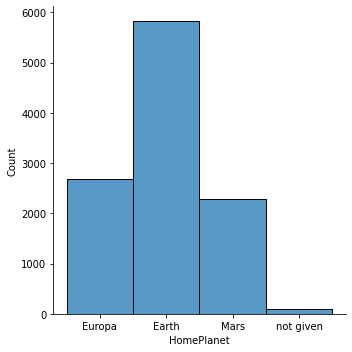

In [23]:
sns.displot(df['HomePlanet'])

In [24]:
df['HomePlanet'].value_counts()


Earth        5829
Europa       2675
Mars         2292
not given      87
Name: HomePlanet, dtype: int64

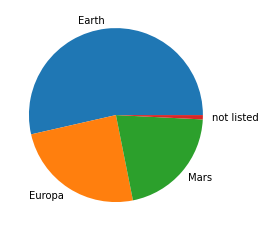

In [25]:
plt.pie(df['HomePlanet'].value_counts(), labels = ["Earth", "Europa", "Mars", "not listed"])
plt.show() 

In [26]:
df['HomePlanet'] = df['HomePlanet'].replace({"Earth":1, "Europa":2, "Mars":3, "not given" :4})
df['HomePlanet']

0       2
1       1
2       2
3       2
4       1
       ..
4272    1
4273    1
4274    3
4275    2
4276    1
Name: HomePlanet, Length: 10883, dtype: int64

#### CryoSleep

In [27]:
df['CryoSleep'].value_counts()

False        6914
True         3876
not given      93
Name: CryoSleep, dtype: int64

In [28]:
df['CryoSleep'][df['CryoSleep'] == "not given"] = False

In [29]:
df['CryoSleep'] = df['CryoSleep'].replace({False: 0, True: 1})
df['CryoSleep']

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 10883, dtype: int64

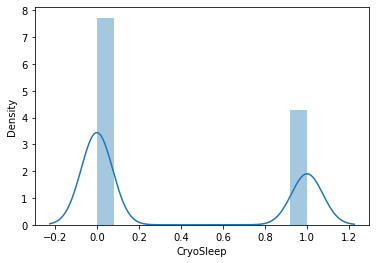

In [30]:
sns.distplot(df['CryoSleep'])

#### Destination

In [31]:
df['Destination'].value_counts()

TRAPPIST-1e      7532
55 Cancri e      2248
PSO J318.5-22    1011
not given          92
Name: Destination, dtype: int64

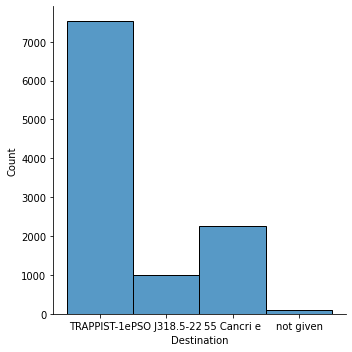

In [32]:
sns.displot(df['Destination'])

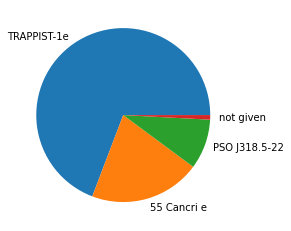

In [33]:
plt.pie(df['Destination'].value_counts(), labels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22", "not given"])
plt.show() 

In [34]:
df['Destination'].replace({"TRAPPIST-1e": 1, "55 Cancri e": 2, "PSO J318.5-22": 3, "not given": 4},inplace=True)
df['Destination']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    2
4275    4
4276    3
Name: Destination, Length: 10883, dtype: int64

#### Age

In [35]:
df['Age'] = pd.cut(x=df['Age'], bins=[-1,18,30,60,100], labels=['child', 'youth', 'adult', 'old'])
df['Age']

0       adult
1       youth
2       adult
3       adult
4       child
        ...  
4272    adult
4273    adult
4274    youth
4275    youth
4276    adult
Name: Age, Length: 10883, dtype: category
Categories (4, object): ['child' < 'youth' < 'adult' < 'old']

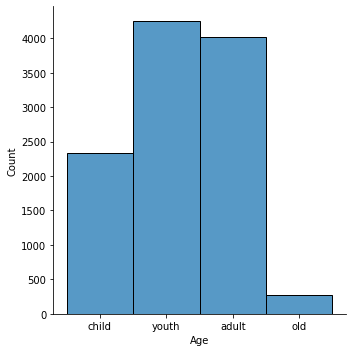

In [36]:
sns.displot(df['Age'])

In [37]:
df['Age'].value_counts()

youth    4250
adult    4013
child    2340
old       280
Name: Age, dtype: int64

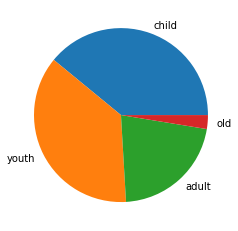

In [38]:
plt.pie(df['Age'].value_counts(), labels=['child', 'youth', 'adult', 'old'])
plt.show()

In [39]:
df['Age'].replace({'child':1, 'youth':2, 'adult':3, 'old':4}, inplace=True)
df['Age']

0       3
1       2
2       3
3       3
4       1
       ..
4272    3
4273    3
4274    2
4275    2
4276    3
Name: Age, Length: 10883, dtype: int64

#### VIP

In [40]:
df['VIP'][df['VIP'] == "not given"] = False

In [41]:
df['VIP'].replace({False: 0, True: 1}, inplace=True)

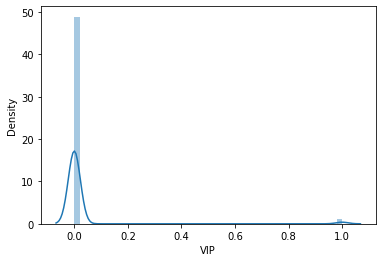

In [42]:
sns.distplot(df['VIP'])

#### Room Service

In [43]:
df['RoomService'].max()

11567.0

In [44]:
df['RoomService'] = pd.cut(x=df['RoomService'], bins=[-1, 4000, 8000, 12000], labels=['low','mid','high'])
df['RoomService']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: RoomService, Length: 10883, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

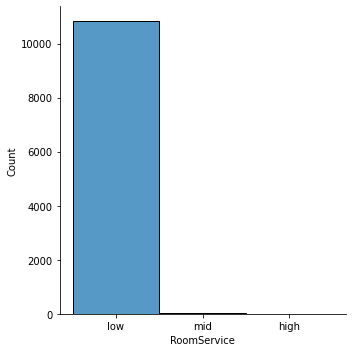

In [45]:
sns.displot(df['RoomService'])

In [46]:
df['RoomService'].value_counts()

low     10835
mid        42
high        6
Name: RoomService, dtype: int64

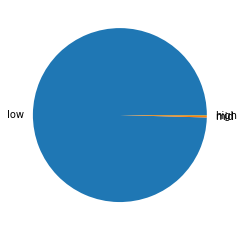

In [47]:
plt.pie(df['RoomService'].value_counts(), labels = ["low", "mid", "high"])
plt.show()

In [48]:
df['RoomService'].replace({"low":1, "mid":2, "high":3}, inplace=True)
df['RoomService']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: RoomService, Length: 10883, dtype: int64

#### Food Court

In [49]:
print(df['FoodCourt'].max())

29813.0


In [50]:
df['FoodCourt'] = pd.cut(x=df['FoodCourt'], bins=[-1, 6000, 12000, 30000], labels = ['low', 'mid', 'high'])
df['FoodCourt']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: FoodCourt, Length: 10883, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

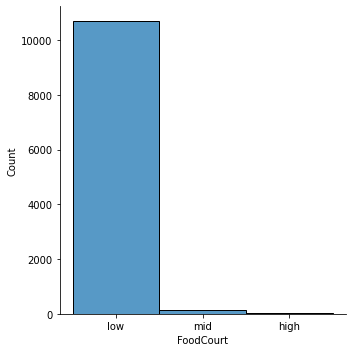

In [51]:
sns.displot(df['FoodCourt'])

In [52]:
df['FoodCourt'].value_counts()

low     10693
mid       155
high       35
Name: FoodCourt, dtype: int64

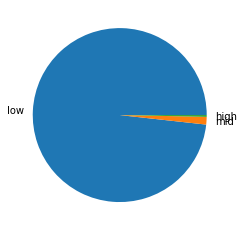

In [53]:
plt.pie(df['FoodCourt'].value_counts(), labels = ["low", "mid", "high"])
plt.show()

In [54]:
df['FoodCourt'].replace({"low": 1, "mid": 2, "high": 3},inplace=True)
df['FoodCourt']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: FoodCourt, Length: 10883, dtype: int64

#### Shopping Mall

In [55]:
df['ShoppingMall'].max()

12253.0

In [56]:
df['ShoppingMall'] = pd.cut(x=df['ShoppingMall'], bins=[-1, 4000, 8000, 13000], labels=['low', 'mid', 'high'])
df['ShoppingMall']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: ShoppingMall, Length: 10883, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

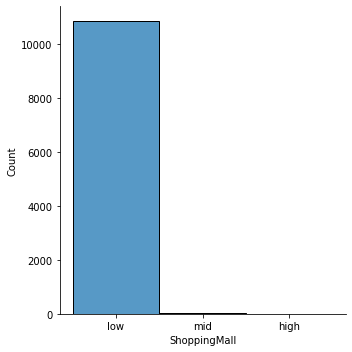

In [57]:
sns.displot(df['ShoppingMall'])

In [58]:
df['ShoppingMall'].value_counts()

low     10840
mid        35
high        8
Name: ShoppingMall, dtype: int64

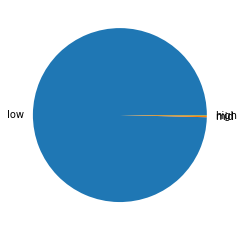

In [59]:
plt.pie(df['ShoppingMall'].value_counts(), labels = ["low", "mid", "high"])
plt.show()

In [60]:
df['ShoppingMall'].replace({"low":1, "mid":2, "high":3}, inplace=True)
df['ShoppingMall']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: ShoppingMall, Length: 10883, dtype: int64

#### Spa

In [61]:
df['Spa'].max()

22408.0

In [62]:
df['Spa'] = pd.cut(x=df['Spa'], bins=[-1, 5000, 15000, 23000], labels=['low', 'mid', 'high'])
df['Spa']

0       low
1       low
2       mid
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Spa, Length: 10883, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

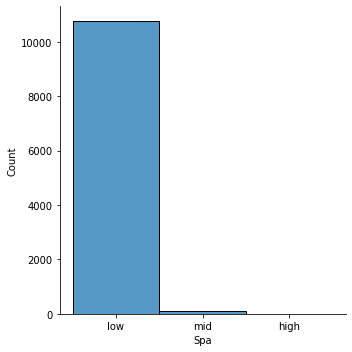

In [63]:
sns.displot(df['Spa'])

In [64]:
df['Spa'].value_counts()

low     10762
mid       112
high        9
Name: Spa, dtype: int64

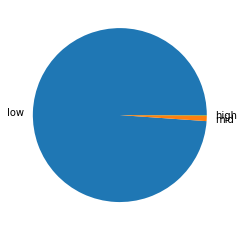

In [65]:
plt.pie(df['Spa'].value_counts(), labels=["low", "mid", "high"])
plt.show()

In [66]:
df['Spa'].replace({"low": 1, "mid": 2, "high": 3},inplace=True)
df['Spa']

0       1
1       1
2       2
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Spa, Length: 10883, dtype: int64

#### VR Deck

In [67]:
df['VRDeck'].max()

22272.0

In [68]:
df['VRDeck'] = pd.cut(x=df['VRDeck'], bins=[-1, 5000, 15000, 23000], labels=['low', 'mid', 'high'])
df['VRDeck']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: VRDeck, Length: 10883, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

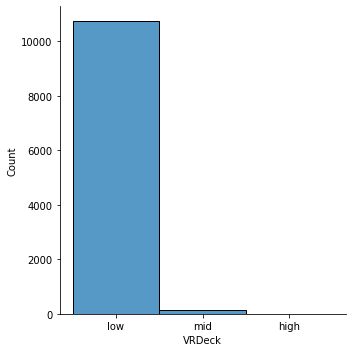

In [69]:
sns.displot(df['VRDeck'])

In [70]:
df['VRDeck'].value_counts()

low     10746
mid       127
high       10
Name: VRDeck, dtype: int64

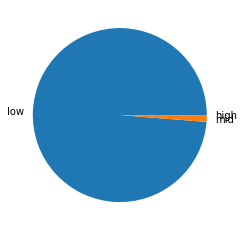

In [71]:
plt.pie(df['VRDeck'].value_counts(), labels=["low", "mid", "high"])
plt.show()

In [72]:
df['VRDeck'].replace({"low":1, "mid":2, "high":3}, inplace=True)
df['VRDeck']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: VRDeck, Length: 10883, dtype: int64

### Assigning Features

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   10883 non-null  object
 1   HomePlanet    10883 non-null  int64 
 2   CryoSleep     10883 non-null  int64 
 3   Cabin         10883 non-null  object
 4   Destination   10883 non-null  int64 
 5   Age           10883 non-null  int64 
 6   VIP           10883 non-null  int64 
 7   RoomService   10883 non-null  int64 
 8   FoodCourt     10883 non-null  int64 
 9   ShoppingMall  10883 non-null  int64 
 10  Spa           10883 non-null  int64 
 11  VRDeck        10883 non-null  int64 
 12  Name          10883 non-null  object
dtypes: int64(10), object(3)
memory usage: 1.2+ MB


In [74]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,2,0,B/0/P,1,3,0,1,1,1,1,1,Maham Ofracculy
1,0002_01,1,0,F/0/S,1,2,0,1,1,1,1,1,Juanna Vines
2,0003_01,2,0,A/0/S,1,3,1,1,1,1,2,1,Altark Susent
3,0003_02,2,0,A/0/S,1,3,0,1,1,1,1,1,Solam Susent
4,0004_01,1,0,F/1/S,1,1,0,1,1,1,1,1,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,3,0,1,1,1,1,1,Jeron Peter
4273,9269_01,1,0,not given,1,3,0,1,1,1,1,1,Matty Scheron
4274,9271_01,3,1,D/296/P,2,2,0,1,1,1,1,1,Jayrin Pore
4275,9273_01,2,0,D/297/P,4,2,0,1,1,1,1,1,Kitakan Conale


In [75]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

y = survival
X = df[features][:len(data)]
X_val = df[features][len(data):]

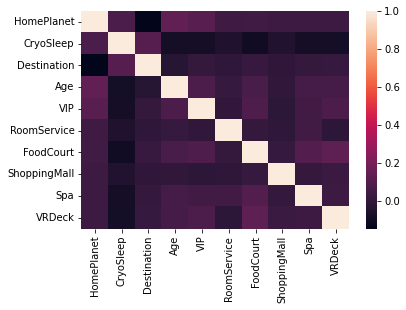

In [76]:
cmap = df[features].corr()
sns.heatmap(cmap)

### Splitting Dataset in Test and Train

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape

((5945, 10), (661, 10), (5945,), (661,), (4277, 10))

### Model

#### Selecting Model

In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, C=10).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7342304457527334


#### Validation

In [79]:
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.7291981845688351


#### Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[281  44]
 [135 201]]


### Prediction on X_test

In [81]:
predictions = model.predict(X_val)
predictions = predictions.astype(str)
predictions = np.char.replace(predictions, '0', 'False')
predictions = np.char.replace(predictions, '1', 'True')
print(len(predictions))

4277


In [82]:
sample['Transported'] = predictions
sample.to_csv('submission.csv', index=False)
my_submission = pd.read_csv("submission.csv")
my_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
